# Modeling Slippage: Generating Random Slippage Values

# 1 - Loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_ta as ta
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tqdm.notebook import tqdm

In [2]:
df = yf.download("EURUSD=X", period="max", interval="1d", auto_adjust=True)
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2003-12-01,1.196501,1.204007,1.194401,1.203398,0
2003-12-02,1.208897,1.210903,1.194600,1.196101,0
2003-12-03,1.212298,1.213003,1.207700,1.209000,0
2003-12-04,1.208094,1.214403,1.204398,1.212004,0
2003-12-05,1.218695,1.219096,1.206593,1.207802,0
...,...,...,...,...,...
2026-02-09,1.182578,1.192520,1.181782,1.182620,0
2026-02-10,1.190405,1.192848,1.189018,1.190476,0
2026-02-11,1.188962,1.192734,1.183908,1.188792,0


# 2 - Visualizing price chart

In [3]:
start_index = 0
num_rows = 100

df_subset = df.iloc[start_index:start_index + num_rows].copy()

fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Candlestick(
        x=df_subset.index,
        open=df_subset['Open'],
        high=df_subset['High'],
        low=df_subset['Low'],
        close=df_subset['Close'],
        name='Price'
    ),
    row=1, col=1
)

# 3 - Visualizing the Closing price

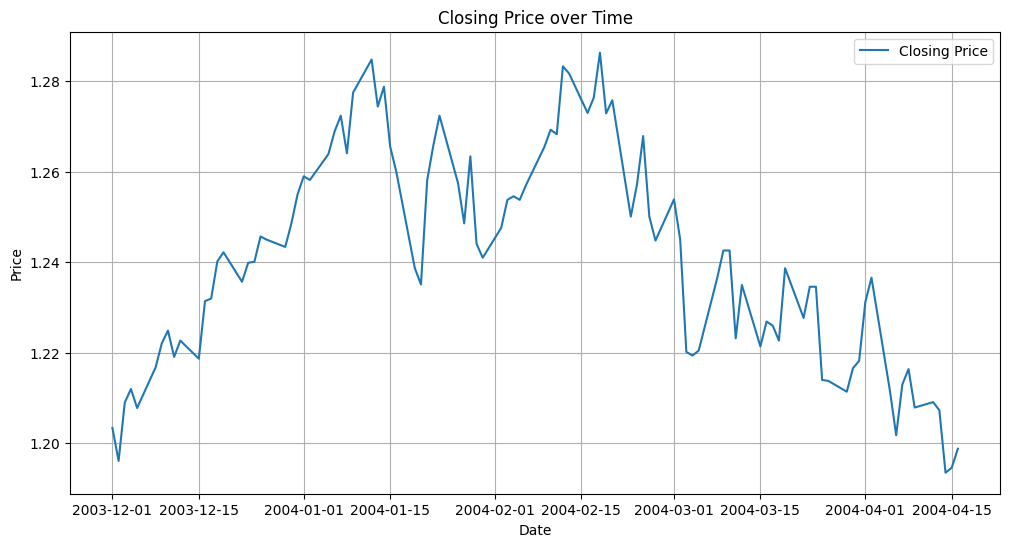

In [4]:
start_index = 0
num_rows = 100
df_subset = df.iloc[start_index:start_index + num_rows].copy()

plt.figure(figsize=(12, 6))
plt.plot(df_subset.index, df_subset['Close'], label='Closing Price')
plt.title('Closing Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# 4 - Adding random noise / blur to Closing price

In [5]:
# df['Closing_Noise'] = np.random.normal(df['Close'], df['Close'] * 0.001, len(df))
df['Closing_Noise'] = np.random.normal(df['Close'], 0.001, len(df))

In [6]:
df

,Open,High,Low,Close,Volume,Closing_Noise
Date,,,,,,
2003-12-01,1.196501,1.204007,1.194401,1.203398,0,1.201358
2003-12-02,1.208897,1.210903,1.194600,1.196101,0,1.194654
2003-12-03,1.212298,1.213003,1.207700,1.209000,0,1.208492
2003-12-04,1.208094,1.214403,1.204398,1.212004,0,1.212092
2003-12-05,1.218695,1.219096,1.206593,1.207802,0,1.207882
...,...,...,...,...,...,...
2026-02-09,1.182578,1.192520,1.181782,1.182620,0,1.182663
2026-02-10,1.190405,1.192848,1.189018,1.190476,0,1.188882
2026-02-11,1.188962,1.192734,1.183908,1.188792,0,1.187064


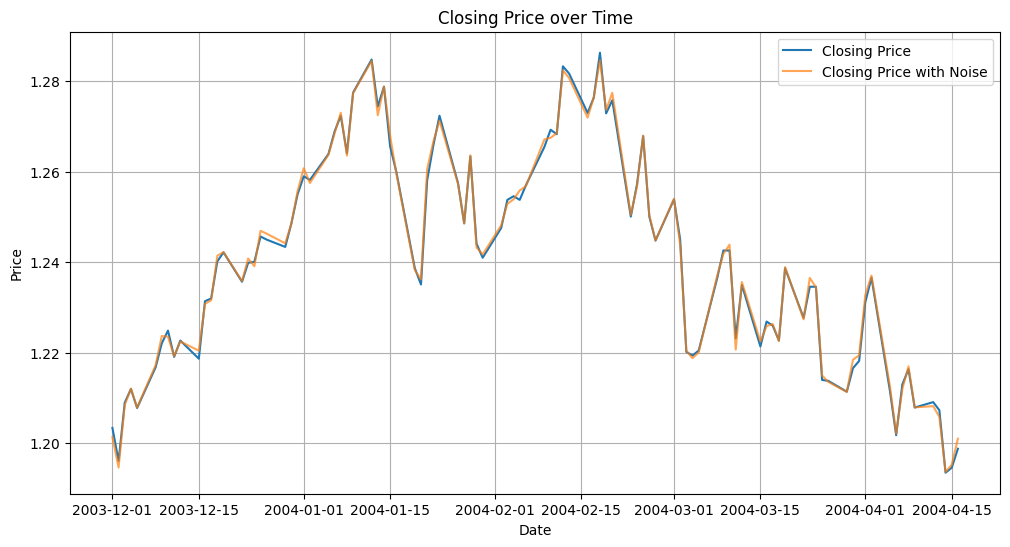

In [7]:
start_index = 0
num_rows = 100
df_subset = df.iloc[start_index:start_index + num_rows].copy()

plt.figure(figsize=(12, 6))
plt.plot(df_subset.index, df_subset['Close'], label='Closing Price')
plt.plot(df_subset.index, df_subset['Closing_Noise'], label='Closing Price with Noise', alpha=0.7)
plt.title('Closing Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# 5 - Generating multiple randomly blurred Closing prices

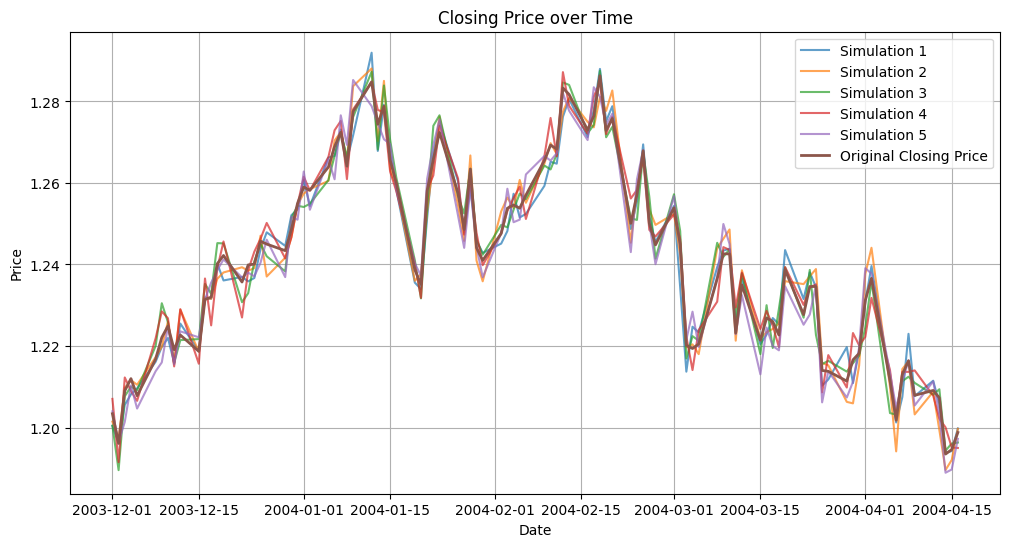

In [8]:
num_simulations = 5
start_index = 0
end_index = 100
df_subset = df.iloc[start_index:end_index].copy()

plt.figure(figsize=(12, 6))

for i in range(num_simulations):
    df_subset[f'Closing_Noise_{i}'] = np.random.normal(df_subset['Close'], df_subset['Close'] * 0.003, len(df_subset))
    plt.plot(df_subset.index, df_subset[f'Closing_Noise_{i}'], label=f'Simulation {i+1}', alpha=0.7)

plt.plot(df_subset.index, df_subset['Close'], label='Original Closing Price', linewidth=2)
plt.title('Closing Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [9]:
for i in range(5):
    df[f'Closing_Noise_{i}'] = np.random.normal(df['Close'], df['Close'] * 0.003, len(df))

In [10]:
df

,Open,High,Low,Close,Volume,Closing_Noise,Closing_Noise_0,Closing_Noise_1,Closing_Noise_2,Closing_Noise_3,Closing_Noise_4
Date,,,,,,,,,,,
2003-12-01,1.196501,1.204007,1.194401,1.203398,0,1.201358,1.205197,1.197559,1.208962,1.202229,1.207117
2003-12-02,1.208897,1.210903,1.194600,1.196101,0,1.194654,1.196822,1.195809,1.192807,1.192597,1.199916
2003-12-03,1.212298,1.213003,1.207700,1.209000,0,1.208492,1.209225,1.215551,1.207485,1.204511,1.205045
2003-12-04,1.208094,1.214403,1.204398,1.212004,0,1.212092,1.211813,1.210691,1.216630,1.216645,1.216313
2003-12-05,1.218695,1.219096,1.206593,1.207802,0,1.207882,1.218241,1.208279,1.205542,1.207114,1.206144
...,...,...,...,...,...,...,...,...,...,...,...
2026-02-09,1.182578,1.192520,1.181782,1.182620,0,1.182663,1.186249,1.179382,1.182735,1.182901,1.187202
2026-02-10,1.190405,1.192848,1.189018,1.190476,0,1.188882,1.189001,1.189332,1.191224,1.191364,1.187585
2026-02-11,1.188962,1.192734,1.183908,1.188792,0,1.187064,1.191941,1.188655,1.189415,1.189859,1.188243


# 6 - Visualizing generated slippage

In [11]:
df['Slippage'] = df['Close'] - df['Closing_Noise']
df

,Open,High,Low,Close,Volume,Closing_Noise,Closing_Noise_0,Closing_Noise_1,Closing_Noise_2,Closing_Noise_3,Closing_Noise_4,Slippage
Date,,,,,,,,,,,,
2003-12-01,1.196501,1.204007,1.194401,1.203398,0,1.201358,1.205197,1.197559,1.208962,1.202229,1.207117,0.002041
2003-12-02,1.208897,1.210903,1.194600,1.196101,0,1.194654,1.196822,1.195809,1.192807,1.192597,1.199916,0.001447
2003-12-03,1.212298,1.213003,1.207700,1.209000,0,1.208492,1.209225,1.215551,1.207485,1.204511,1.205045,0.000507
2003-12-04,1.208094,1.214403,1.204398,1.212004,0,1.212092,1.211813,1.210691,1.216630,1.216645,1.216313,-0.000089
2003-12-05,1.218695,1.219096,1.206593,1.207802,0,1.207882,1.218241,1.208279,1.205542,1.207114,1.206144,-0.000080
...,...,...,...,...,...,...,...,...,...,...,...,...
2026-02-09,1.182578,1.192520,1.181782,1.182620,0,1.182663,1.186249,1.179382,1.182735,1.182901,1.187202,-0.000043
2026-02-10,1.190405,1.192848,1.189018,1.190476,0,1.188882,1.189001,1.189332,1.191224,1.191364,1.187585,0.001594
2026-02-11,1.188962,1.192734,1.183908,1.188792,0,1.187064,1.191941,1.188655,1.189415,1.189859,1.188243,0.001728


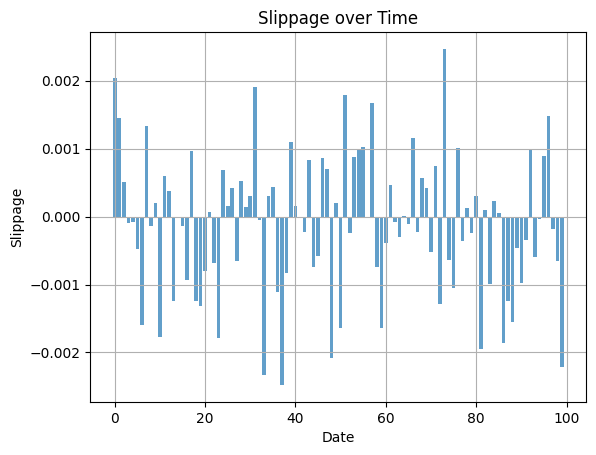

In [12]:
df_subset['Slippage'] = df_subset['Close'] - df_subset['Closing_Noise']
df_subset.reset_index(inplace=True)

plt.bar(df_subset.index, df_subset['Slippage'], width=0.8, alpha=0.7)
plt.title('Slippage over Time')
plt.xlabel('Date')
plt.ylabel('Slippage')
plt.grid()
plt.show()

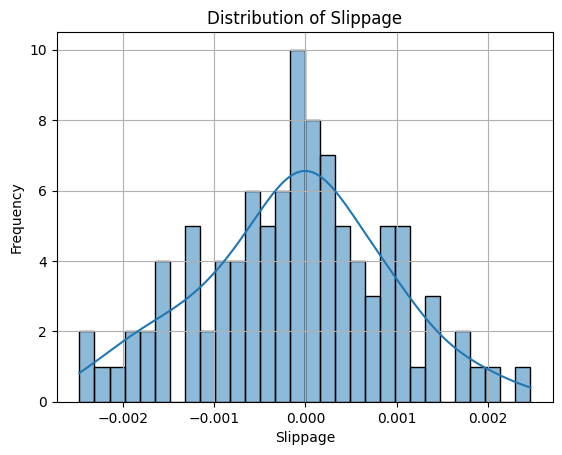

In [13]:
sns.histplot(df_subset['Slippage'], bins=30, kde=True)
plt.title('Distribution of Slippage')
plt.xlabel('Slippage')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# 7 - Generating slippage using Cauchy distribution

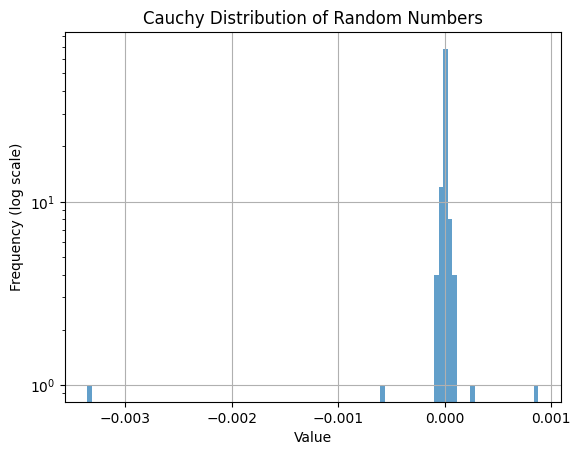

In [14]:
random_numbers = np.random.standard_cauchy(size=len(df_subset))*1e-5+0
random_numbers = np.clip(random_numbers, -5e-3, 5e-3)

plt.hist(random_numbers, bins=100, alpha=0.7)
plt.yscale('log')
plt.title('Cauchy Distribution of Random Numbers')
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.grid()
plt.show()

In [15]:
df_subset['Slippage'] = random_numbers
df_subset['Closing_Noise_Cauchy'] = df_subset['Close'] + df_subset['Slippage']

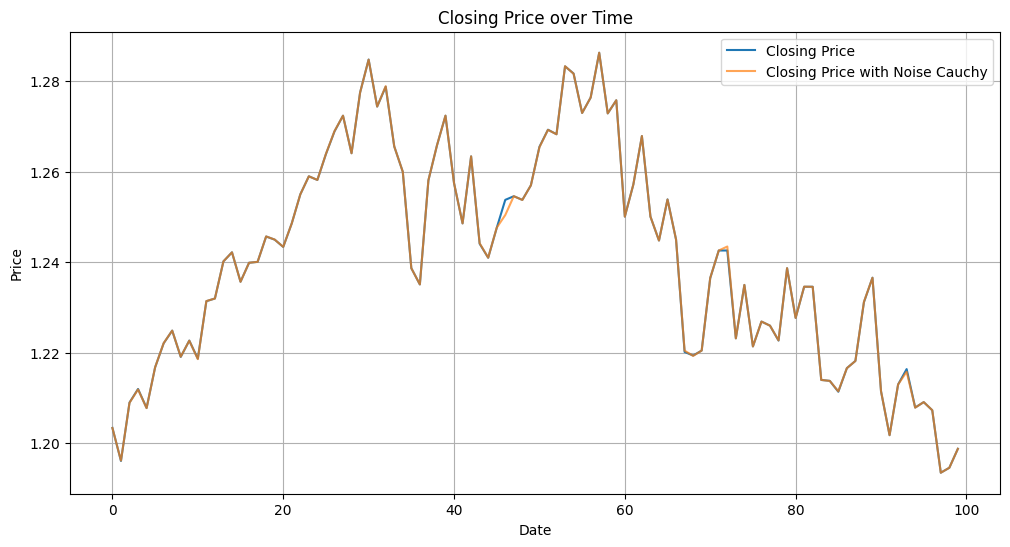

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df_subset.index, df_subset['Close'], label='Closing Price')
plt.plot(df_subset.index, df_subset['Closing_Noise_Cauchy'], label='Closing Price with Noise Cauchy', alpha=0.7)
plt.title('Closing Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# 8 - Combining Cauchy and Normal Distributions to Generate Clusterd Slippage

In [17]:
df.reset_index(inplace=True)
df['Slippage_Trigger'] = 0

indices = df.index[df['Slippage'] > 1e-4]

for index in indices:
    start = max(0, index - 5)
    end = min(len(df), index + 5)
    df.loc[start:end, 'Slippage_Trigger'] = 1

df[df['Slippage_Trigger'] != 0]

,Date,Open,High,Low,Close,Volume,Closing_Noise,Closing_Noise_0,Closing_Noise_1,Closing_Noise_2,Closing_Noise_3,Closing_Noise_4,Slippage,Slippage_Trigger
0,2003-12-01,1.196501,1.204007,1.194401,1.203398,0,1.201358,1.205197,1.197559,1.208962,1.202229,1.207117,0.002041,1
1,2003-12-02,1.208897,1.210903,1.194600,1.196101,0,1.194654,1.196822,1.195809,1.192807,1.192597,1.199916,0.001447,1
2,2003-12-03,1.212298,1.213003,1.207700,1.209000,0,1.208492,1.209225,1.215551,1.207485,1.204511,1.205045,0.000507,1
3,2003-12-04,1.208094,1.214403,1.204398,1.212004,0,1.212092,1.211813,1.210691,1.216630,1.216645,1.216313,-0.000089,1
4,2003-12-05,1.218695,1.219096,1.206593,1.207802,0,1.207882,1.218241,1.208279,1.205542,1.207114,1.206144,-0.000080,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5756,2026-02-09,1.182578,1.192520,1.181782,1.182620,0,1.182663,1.186249,1.179382,1.182735,1.182901,1.187202,-0.000043,1
5757,2026-02-10,1.190405,1.192848,1.189018,1.190476,0,1.188882,1.189001,1.189332,1.191224,1.191364,1.187585,0.001594,1
5758,2026-02-11,1.188962,1.192734,1.183908,1.188792,0,1.187064,1.191941,1.188655,1.189415,1.189859,1.188243,0.001728,1
5759,2026-02-12,1.187606,1.189061,1.185326,1.187536,0,1.185895,1.188331,1.188707,1.191098,1.193777,1.193487,0.001641,1


In [18]:
df['Closing_Noise'] = df['Close'].where(df['Slippage_Trigger'] == 0, np.random.normal(df['Close'], 0.001))

In [19]:
df[df['Slippage_Trigger'] != 0]

,Date,Open,High,Low,Close,Volume,Closing_Noise,Closing_Noise_0,Closing_Noise_1,Closing_Noise_2,Closing_Noise_3,Closing_Noise_4,Slippage,Slippage_Trigger
0,2003-12-01,1.196501,1.204007,1.194401,1.203398,0,1.201861,1.205197,1.197559,1.208962,1.202229,1.207117,0.002041,1
1,2003-12-02,1.208897,1.210903,1.194600,1.196101,0,1.196787,1.196822,1.195809,1.192807,1.192597,1.199916,0.001447,1
2,2003-12-03,1.212298,1.213003,1.207700,1.209000,0,1.208239,1.209225,1.215551,1.207485,1.204511,1.205045,0.000507,1
3,2003-12-04,1.208094,1.214403,1.204398,1.212004,0,1.211069,1.211813,1.210691,1.216630,1.216645,1.216313,-0.000089,1
4,2003-12-05,1.218695,1.219096,1.206593,1.207802,0,1.206733,1.218241,1.208279,1.205542,1.207114,1.206144,-0.000080,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5756,2026-02-09,1.182578,1.192520,1.181782,1.182620,0,1.182709,1.186249,1.179382,1.182735,1.182901,1.187202,-0.000043,1
5757,2026-02-10,1.190405,1.192848,1.189018,1.190476,0,1.190511,1.189001,1.189332,1.191224,1.191364,1.187585,0.001594,1
5758,2026-02-11,1.188962,1.192734,1.183908,1.188792,0,1.189833,1.191941,1.188655,1.189415,1.189859,1.188243,0.001728,1
5759,2026-02-12,1.187606,1.189061,1.185326,1.187536,0,1.185751,1.188331,1.188707,1.191098,1.193777,1.193487,0.001641,1


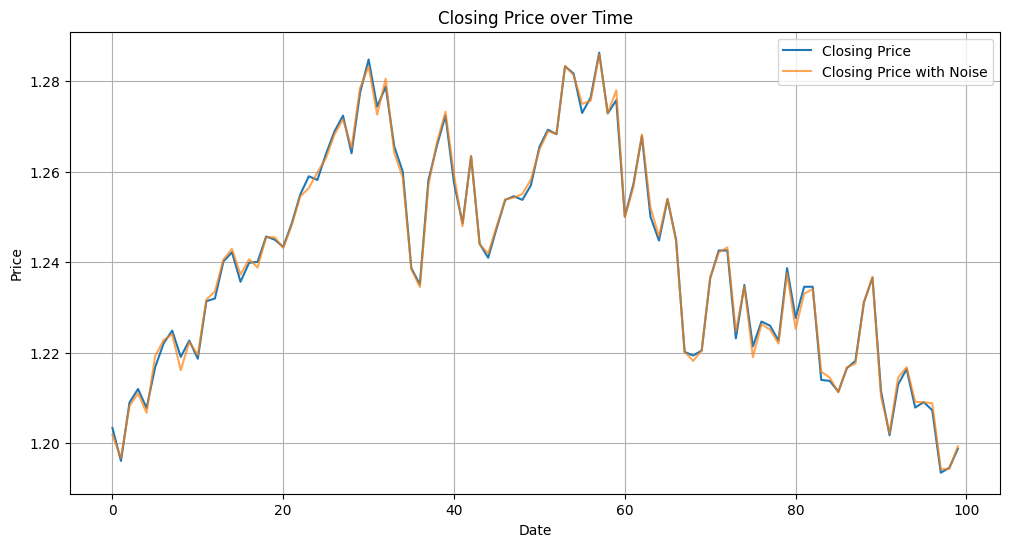

In [20]:
start_index = 0
num_rows = 100
df_subset = df.iloc[start_index:start_index + num_rows].copy()

plt.figure(figsize=(12, 6))
plt.plot(df_subset.index, df_subset['Close'], label='Closing Price')
plt.plot(df_subset.index, df_subset['Closing_Noise'], label='Closing Price with Noise', alpha=0.7)
plt.title('Closing Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()